# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
# 載入手寫數字辨識集
digits = datasets.load_digits()
X = digits.data
y = digits.target
print('X:\n', X[:3])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

y:
 [0 1 2 3 4 5 6 7 8 9]

unique y:
 [0 1 2 3 4 5 6 7 8 9]


# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與邏輯斯迴歸做手寫辨識的效果

In [3]:
# 定義 PCA 與隨後的邏輯斯迴歸函數，並執行 GridSearchCV 跑出最佳參數
pca = PCA()
pca.fit(X)
pipe = Pipeline(steps=[
    ('pca', PCA(),),
    ('logistic', SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0),)
])
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, cv=5, iid=False, return_train_score=False)
search.fit(X, y)
print('Best parameter (CV score={:.3f}): {}'.format(search.best_score_, search.best_params_))

Best parameter (CV score=0.911): {'logistic__alpha': 0.01, 'pca__n_components': 30}


In [4]:
search_results = pd.DataFrame(search.cv_results_)
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116435,0.014882,0.000800,0.000400,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.750000,0.599448,0.693593,0.697479,0.608451,0.669794,0.057406,14
1,0.124563,0.018934,0.000800,0.000400,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.853591,0.888579,0.887955,0.836620,0.874668,0.025617,12
2,0.151645,0.017342,0.000800,0.000400,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.923077,0.870166,0.896936,0.943978,0.890141,0.904859,0.025866,5
3,0.164826,0.036825,0.001000,0.000632,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.920330,0.870166,0.922006,0.955182,0.878873,0.909311,0.031130,2
4,0.167588,0.029473,0.001199,0.000400,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.903846,0.848066,0.938719,0.946779,0.904225,0.908327,0.034844,4


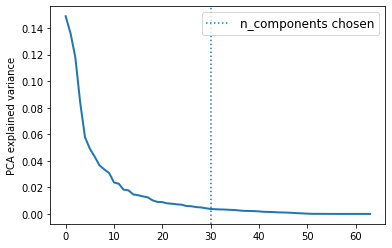

In [5]:
# 繪製不同 components 的 PCA 解釋度
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.ylabel('PCA explained variance')
plt.legend(prop=dict(size=12))
plt.show()

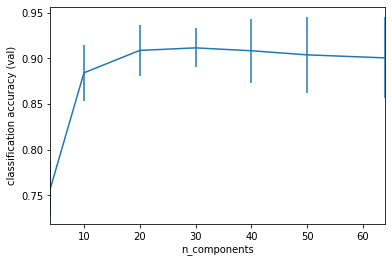

In [6]:
# 繪製不同採樣點的分類預測正確率
best_clfs = search_results.groupby('param_pca__n_components').apply(lambda x: x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score', legend=False)
plt.xlabel('n_components')
plt.ylabel('classification accuracy (val)')
plt.show()